<a href="https://colab.research.google.com/github/srinithi5011/Twitter-Sentimental-analysis-Fake-News-detection-/blob/main/Twitter_News_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!wget https://raw.githubusercontent.com/KaiDMML/FakeNewsNet/master/dataset/gossipcop_fake.csv -O gossipcop_fake.csv
!wget https://raw.githubusercontent.com/KaiDMML/FakeNewsNet/master/dataset/gossipcop_real.csv -O gossipcop_real.csv
!wget https://raw.githubusercontent.com/KaiDMML/FakeNewsNet/master/dataset/politifact_fake.csv -O politifact_fake.csv
!wget https://raw.githubusercontent.com/KaiDMML/FakeNewsNet/master/dataset/politifact_real.csv -O politifact_real.csv
gossip_fake = pd.read_csv("gossipcop_fake.csv")
gossip_real = pd.read_csv("gossipcop_real.csv")
politifact_fake = pd.read_csv("politifact_fake.csv")
politifact_real = pd.read_csv("politifact_real.csv")

--2025-02-20 14:18:22--  https://raw.githubusercontent.com/KaiDMML/FakeNewsNet/master/dataset/gossipcop_fake.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12538704 (12M) [text/plain]
Saving to: ‘gossipcop_fake.csv’

gossipcop_fake.csv  100%[===================>]  11.96M  --.-KB/s    in 0.1s    

2025-02-20 14:18:23 (108 MB/s) - ‘gossipcop_fake.csv’ saved [12538704/12538704]

--2025-02-20 14:18:23--  https://raw.githubusercontent.com/KaiDMML/FakeNewsNet/master/dataset/gossipcop_real.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK

In [ ]:
gossip_fake["label"] = 1  # Fake news
gossip_real["label"] = 0  # Real news
politifact_fake["label"] = 1
politifact_real["label"] = 0

df = pd.concat([gossip_fake, gossip_real, politifact_fake, politifact_real], ignore_index=True)
df.head()

,id,news_url,title,tweet_ids,label
0,gossipcop-2493749932,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,284329075902926848\t284332744559968256\t284335...,1
1,gossipcop-4580247171,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,992895508267130880\t992897935418503169\t992899...,1
2,gossipcop-941805037,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,853359353532829696\t853359576543920128\t853359...,1
3,gossipcop-2547891536,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,988821905196158981\t988824206556172288\t988825...,1
4,gossipcop-5476631226,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,955792793632432131\t955795063925301249\t955798...,1


In [ ]:
df.shape

(23196, 5)

In [ ]:
df.columns

Index(['id', 'news_url', 'title', 'tweet_ids', 'label'], dtype='object')

In [ ]:
df.describe()

,label
count,23196.000000
mean,0.248103
std,0.431921
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


from matplotlib import pyplot as plt
_df_0['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['label'].plot(kind='line', figsize=(8, 4), title='label')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23196 entries, 0 to 23195
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         23196 non-null  object
 1   news_url   22866 non-null  object
 2   title      23196 non-null  object
 3   tweet_ids  21695 non-null  object
 4   label      23196 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 906.2+ KB


In [ ]:
#news=df.drop(['Tweets_Ago'],axis=1)
df.shape

(23196, 5)

In [ ]:
df.columns

Index(['id', 'news_url', 'title', 'tweet_ids', 'label'], dtype='object')

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
23191,False
23192,False
23193,False
23194,False


In [ ]:
df.duplicated().sum()

0

In [ ]:
# 400 real datas
df.drop_duplicates(inplace=True)
df.shape

(23196, 5)

In [ ]:
df.isnull()

,id,news_url,title,tweet_ids,label
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
23191,False,False,False,True,False
23192,False,False,False,False,False
23193,False,False,False,True,False
23194,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
id,0
news_url,330
title,0
tweet_ids,1501
label,0


In [ ]:
df.dropna(how='any',inplace=True)

In [ ]:
df.columns

Index(['id', 'news_url', 'title', 'tweet_ids', 'label'], dtype='object')

In [ ]:
#tnews=df.rename(columns={'Compound_Score':'score',
                        #    'Tweet_Text':'Text',})


In [ ]:
df.columns

Index(['id', 'news_url', 'title', 'tweet_ids', 'label'], dtype='object')

In [ ]:
#Here there is no need to change the datatype as all the datas are specific
# but syntax for changing datatye is
#tnews['Timestamp']=tnews['Timestamp'].astype(str)
#tnews['Timestamp']=tnews['Timestamp'].astype(float/int)

In [ ]:
df['tweet_ids'].unique()

array(['284329075902926848\t284332744559968256\t284335412590297089\t284359918792880128\t284385385151332353\t284456388833452032\t284644878267318273\t284656558963564545\t284705391965794304\t284705391957401601\t284762425553723392\t284766089827721217\t284769766806257664\t284769769490620416\t284769775442337792\t284769772980301824\t284769778655186944\t284769777073917952\t284771913753042944\t284902943201837056\t284918939975303169\t285592266716884993\t285635421872979969\t285635516924301313\t285731324101287937\t295954533555793920\t296639632710459392\t296651276626825216\t700137152143699968\t700501642412560384\t700599457767890944\t700925213031141376\t757598980373045248\t757614017808437248\t757810204448743425\t757855454886293504\t818454872299163649\t818532208990371841\t818622382524997632\t818623644737871872\t824328059335692290\t840237926642536449\t840277988067430400\t840305556736872448\t840312641042104320\t840320383437877248\t840321378150670336\t840325449389600768\t840346792671698945\t840359115754

In [ ]:
df['tweet_ids'].factorize()

(array([    0,     1,     2, ..., 21307, 21308, 21309]),
 Index(['284329075902926848\t284332744559968256\t284335412590297089\t284359918792880128\t284385385151332353\t284456388833452032\t284644878267318273\t284656558963564545\t284705391965794304\t284705391957401601\t284762425553723392\t284766089827721217\t284769766806257664\t284769769490620416\t284769775442337792\t284769772980301824\t284769778655186944\t284769777073917952\t284771913753042944\t284902943201837056\t284918939975303169\t285592266716884993\t285635421872979969\t285635516924301313\t285731324101287937\t295954533555793920\t296639632710459392\t296651276626825216\t700137152143699968\t700501642412560384\t700599457767890944\t700925213031141376\t757598980373045248\t757614017808437248\t757810204448743425\t757855454886293504\t818454872299163649\t818532208990371841\t818622382524997632\t818623644737871872\t824328059335692290\t840237926642536449\t840277988067430400\t840305556736872448\t840312641042104320\t840320383437877248\t84032137815067

In [ ]:
df['tweet_ids'].factorize()[0]

array([    0,     1,     2, ..., 21307, 21308, 21309])

In [ ]:
def Encode(df):
  for column in df.columns[~df.columns.isin(['tweet_ids','id'])]:
    df[column] = df[column].factorize()[0]
  return df

In [ ]:
df_copy=df.copy(deep=True)

In [ ]:
df_en=Encode(df_copy)

In [ ]:
df_en

,id,news_url,title,tweet_ids,label
0,gossipcop-2493749932,0,0,284329075902926848\t284332744559968256\t284335...,0
1,gossipcop-4580247171,1,1,992895508267130880\t992897935418503169\t992899...,0
2,gossipcop-941805037,2,2,853359353532829696\t853359576543920128\t853359...,0
3,gossipcop-2547891536,3,3,988821905196158981\t988824206556172288\t988825...,0
4,gossipcop-5476631226,4,4,955792793632432131\t955795063925301249\t955798...,0
...,...,...,...,...,...
23189,politifact6931,20309,20078,21096374968\t21096771824\t9413452992876544\t12...,1
23190,politifact13619,20310,20079,817357495047979008\t817357627566985217\t817357...,1
23192,politifact329,20168,19779,634287923135909888\t946743411100536832\t946816...,1
23194,politifact4720,20311,20080,188871706637647874,1


<Axes: >

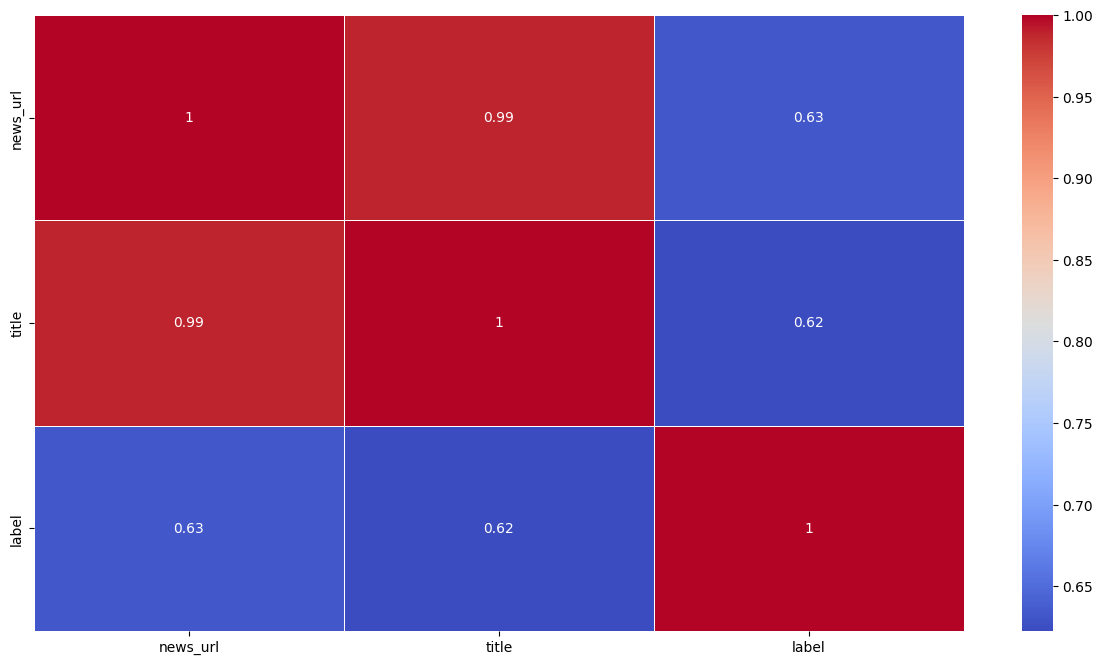

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df_en.corr(numeric_only=True), cbar=True, linewidth=0.5, annot=True, cmap='coolwarm')

In [ ]:
plt.figure(figsize=(15,8))

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

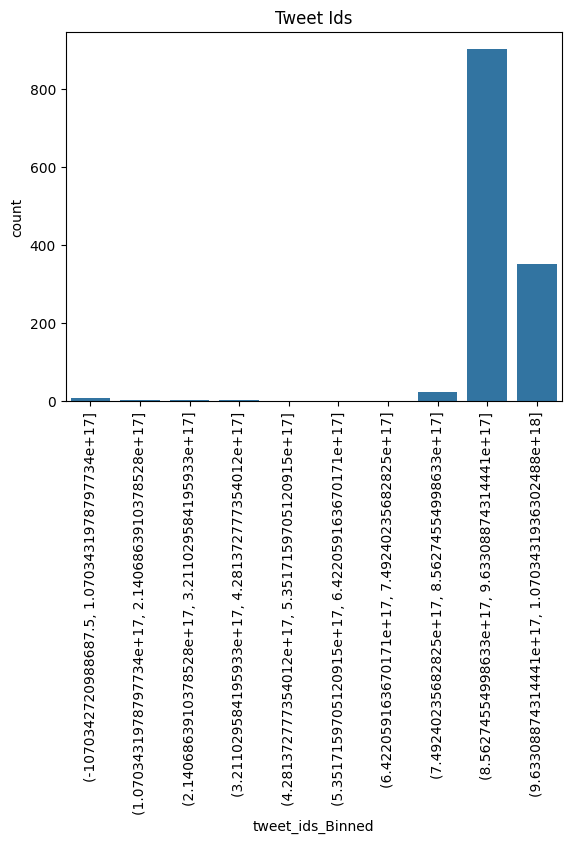

In [ ]:
df['tweet_ids_Binned'] = pd.cut(pd.to_numeric(df['tweet_ids'], errors='coerce'), bins=10)
sns.countplot(df, x='tweet_ids_Binned')
plt.xticks(rotation=90)
plt.title('Tweet Ids')
plt.show()

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
text_data = df['title'].astype(str)  # Ensure text data is string type
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(text_data).toarray()
y = df["label"]

In [ ]:
# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict fake news scores
y_pred = reg.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared Score: {r2}")

Mean Squared Error: 0.1496777031267785
R-Squared Score: 0.19388127192632


In [ ]:
threshold = 0.5  # If fake score > 0.5, classify as Fake news
y_pred_class = (y_pred > threshold).astype(int)

# Compare with actual labels
accuracy = (y_pred_class == y_test).mean()
print(f"Classification Accuracy: {accuracy}")

Classification Accuracy: 0.8145726296123307


In [ ]:
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text.lower())  # Tokenize and lowercase
    stop_words = set(stopwords.words('english'))
    cleaned_tokens = [token for token in tokens if token not in stop_words]
    cleaned_text = ' '.join(cleaned_tokens)
    return cleaned_text

def predict_fake_news(text):
    text_cleaned = clean_text(text)
    text_vectorized = vectorizer.transform([text_cleaned]).toarray()
    fake_score = reg.predict(text_vectorized)[0]
    prediction = "Fake News" if fake_score > 0.5 else "Real News"
    return fake_score, prediction


In [ ]:
import nltk
nltk.download('punkt_tab')

# Example query
query = "Breaking news: A celebrity was spotted with an alien!"
score, result = predict_fake_news(query)
print(f"Fake News Score: {score}")
print(f"Prediction: {result}")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Fake News Score: 0.4802143277939984
Prediction: Real News


In [ ]:
#Example Query 1
query = "BREAKING: Taylor Swift secretly married in a UFO ceremony!"
score, result = predict_fake_news(query)
print(f"Fake News Score: {score}")
print(f"Prediction: {result}")

Fake News Score: 0.8031584418126048
Prediction: Fake News
